# 线性回归

In [286]:
import numpy as np

In [7]:
def loadDataSet(filename):
    dataMat = []; labelMat = []
    with open(filename) as fr:
        numFeat = len(fr.readline().strip().split('\t')) - 1
    with open(filename) as fr:
        for line in fr.readlines():
            lineArr = [];
            curLine = line.strip().split('\t')
#             fltLine = map(float, curLine)
#             dataMat.append(fltLine)
#             labelMat.append(fltLine[-1])  # map处理后的数据不能用[-1]索引
            for i in range(numFeat):
                lineArr.append(float(curLine[i]))
            dataMat.append(lineArr)  # 前两列是自变量
            labelMat.append(float(curLine[-1]))  # 第三列数据是因变量
        return dataMat, labelMat

In [391]:
xArr, yArr = loadDataSet('ex0.txt')

In [122]:
def standRegres(xArr, yArr):
    xMat = np.mat(xArr); yMat = np.mat(yArr).T
#     print(xMat.shape); print(yMat.shape)
    xTx = xMat.T*xMat
    if np.linalg.det(xTx) == 0.0: # 判断行列式值是否为0
        print("This matrix is singular, cannot do inverse.")
        return
    else:
        ws = xTx.I*(xMat.T*yMat)
        return ws

In [217]:
ws = standRegres(xArr, yArr)
print(ws)

[[3.00774324]
 [1.69532264]]


In [218]:
xMat = np.mat(xArr)
yMat = np.mat(yArr)
yhat = xMat*ws

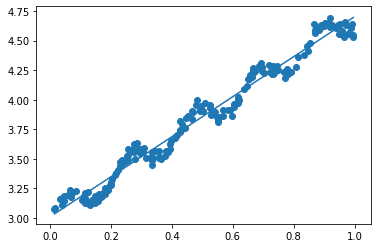

In [219]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
# 散点图，
# 通过flatten.A[0]将矩阵转换为数组,scatter仅接受数组输入
ax.scatter(xMat[:,1].flatten().A[0], yMat.T[:,0].flatten().A[0])

# Numpy matrices必须是2维的,但是numpy arrays(ndarrays)可以是多维的,
# Matrix是Array的一个小的分支，包含于Array。所以matrix 拥有array的所有特性。

# 直线图
xCopy = xMat.copy()
xCopy.sort(0)
yHat = xCopy*ws
ax.plot(xCopy[:,1], yHat)
plt.show()

In [220]:
yMat = np.mat(yArr)

In [223]:
yHat = xMat*ws

In [224]:
np.corrcoef(yHat.T, yMat)

array([[1.        , 0.98647356],
       [0.98647356, 1.        ]])

## flatten().A[0]

In [178]:
a = [[1,3], [2,4], [3,5]]
a = np.mat(a)
print(a)

[[1 3]
 [2 4]
 [3 5]]


In [179]:
# 降维
a.flatten()

matrix([[1, 3, 2, 4, 3, 5]])

In [180]:
# 转换为数组
a.flatten().A

array([[1, 3, 2, 4, 3, 5]])

In [181]:
# 获取第一行
a.flatten().A[0]

array([1, 3, 2, 4, 3, 5])

# 局部加权线性回归

In [254]:
# 利用局部加权，预测一个自变量的因变量
def lwlr(testPoint,xArr,yArr,k=1.0):
    xMat = np.mat(xArr); yMat = np.mat(yArr).T
    m = np.shape(xMat)[0]
    weights = np.mat(np.eye((m)))
    for j in range(m):                      #next 2 lines create weights matrix
        diffMat = testPoint - xMat[j,:]     #
        weights[j,j] = np.exp(diffMat*diffMat.T/(-2.0*k**2))
    xTx = xMat.T * (weights * xMat)
    if np.linalg.det(xTx) == 0.0:
        print("This matrix is singular, cannot do inverse")
        return
    ws = xTx.I * (xMat.T * (weights * yMat))
    return testPoint * ws

In [381]:
def lwlrTest(testArr,xArr,yArr,k=1.0):  #loops over all the data points and applies lwlr to each one
    m = np.shape(testArr)[0]
    yHat = np.zeros(m)
    for i in range(m):
        yHat[i] = lwlr(testArr[i],xArr,yArr,k)
    return yHat

In [280]:
def lwlrTestPlot(xArr,yArr,k=1.0):  #same thing as lwlrTest except it sorts X first
    yHat = np.zeros(np.shape(yArr))       #easier for plotting
    xCopy = np.mat(xArr)
    xCopy.sort(0)
    for i in range(np.shape(xArr)[0]):
        yHat[i] = lwlr(xCopy[i],xArr,yArr,k)
    return yHat,xCopy

In [257]:
xArr,yArr = loadDataSet('ex0.txt')
yArr[0]

3.176513

In [258]:
lwlr(xArr[0],xArr,yArr,1.0)

matrix([[3.12204471]])

In [260]:
lwlr(xArr[0],xArr,yArr,0.001)

matrix([[3.20175729]])

In [261]:
yHat = lwlrTest(xArr, xArr, yArr, 0.003)

In [274]:
xMat = np.mat(xArr)
srtInd = xMat[:,1].argsort(0)
xSort = xMat[srtInd][:,0,:]

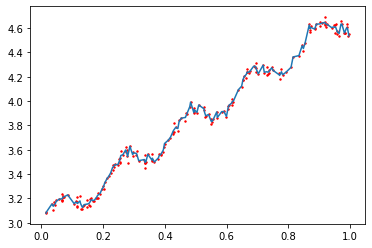

In [271]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(xSort[:,1], yHat[srtInd])
ax.scatter(xMat[:,1].flatten().A[0],
           np.mat(yArr).T.flatten().A[0],s=2,c='red')
plt.show()

## argsort()

In [266]:
# argsort()函数返回的是数组值从小到大的索引值
x = np.array([3, 1, 2])
np.argsort(x)

array([1, 2, 0])

In [336]:
x = np.array([[0, 3], [2, 2]])
x

array([[0, 3],
       [2, 2]])

In [337]:
ind = np.argsort(x, axis=0)  # sorts along first axis (down)
ind

array([[0, 1],
       [1, 0]])

In [339]:
ind = np.argsort(x, axis=1)  # sorts along last axis (across)
ind

array([[0, 1],
       [0, 1]])

## 再来一遍

In [351]:
import matplotlib.pyplot as plt

In [307]:
# 对待预测点附近的每个点赋予一定权重，对样本点进行预测
# weights是仅对角线上元素非0的方阵，用来给没个数据点赋予权重
def lwlr(testpoint, xArr, yArr, k=1.0):
    xMat = np.mat(xArr); yMat = np.mat(yArr).T
    m = xMat.shape[0]
    weights = np.mat(np.eye((m)))
    for i in range(m):
        diffMat = testpoint - xMat[i, :]
        weights[i, i] = np.exp(diffMat*diffMat.T/(-2*k**2))
    xTx = xMat.T*(weights*xMat)
    if np.linalg.det(xTx) == 0:
        print("This matrix is singular, cannot do invers.")
        return 
    ws = xTx.I*(xMat.T*(weights*yMat))
    return testpoint*ws

In [376]:
# 对数据集进行预测
# lwlr与lwlr_test两个函数拆开主要是为了方便确定k值
def lwlr_test(testArr, xArr, yArr, k=1.0):
    m = np.shape(testArr)[0]
    yHat = np.zeros(m)
    for i in range(m):
        yHat[i] = lwlr(testArr[i], xArr, yArr, k)
    return yHat

In [309]:
xArr,yArr = loadDataSet('ex0.txt')

In [310]:
lwlr(xArr[0],xArr,yArr,1.0)

matrix([[3.12204471]])

In [311]:
lwlr(xArr[0],xArr,yArr,0.001)

matrix([[3.20175729]])

In [320]:
yHat = lwlr_test(xArr,xArr,yArr,0.003)

In [321]:
xMat = np.mat(xArr)

In [350]:
srtInd = xMat[:,1].argsort(0)
xSort = xMat[srtInd][:,0,:]

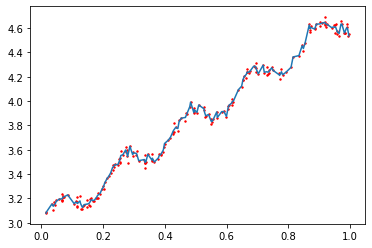

In [352]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(xSort[:,1],yHat[srtInd])
ax.scatter(xMat[:,1].flatten().A[0], np.mat(yArr).T.flatten().A[0], s=2, c='red')

## 预测鲍鱼年龄

In [65]:
def rssError(yArr,yHatArr):
    return ((yArr-yHatArr)**2).sum()

In [394]:
abX,abY=loadDataSet('abalone.txt')

对比不同k值对预测值的影响，目前数据可以看出较小的k值将得到较低的误差。

In [395]:
yHat01 = lwlrTest(abX[0:99], abX[0:99], abY[0:99], 0.1)

In [396]:
yHat1 = lwlr_test(abX[:99], abX[:99], abY[:99], 1)

In [397]:
yHat10 = lwlr_test(abX[:99], abX[:99], abY[:99], 10)

In [398]:
rssError(abY[0:99],yHat01.T)

56.78420911837319

In [399]:
rssError(abY[:99],yHat1.T)

429.8905618703138

In [400]:
rssError(abY[:99],yHat10.T)

549.1181708827038

最小的k值并没有在新数据中取得最好的效果，k=10时测试误差最小（下方代码），但在训练集上误差却最大（上方代码）。

In [401]:
yHat01 = lwlrTest(abX[100:199], abX[0:99], abY[0:99], 0.1)

In [402]:
yHat1 = lwlr_test(abX[100:199], abX[:99], abY[:99], 1)

In [403]:
yHat10 = lwlr_test(abX[100:199], abX[:99], abY[:99], 10)

In [404]:
rssError(abY[100:199],yHat01.T)

25119.417511792763

In [405]:
rssError(abY[100:199],yHat1.T)

573.5261441897468

In [406]:
rssError(abY[100:199],yHat10.T)

517.571190538318

# 缩减系数

## 岭回归

+ 当数据的特征比样本点还多时，即矩阵不是满秩矩阵时，前面的方法计算(X<sup>T</sup>X)<sup>-1</sup>时会出错，为解决这个问题，统计学家引入了岭回归的概念。
+ 现在岭回归也用于在估计中加入偏差，$\color{#FF0000}{通过𝞴来限制所有W之和}$，通过引入该惩罚项，减少不重要的参数，这项技术在统计学中也叫做缩减。缩减方法可以去掉不重要的参数，因此能更好的理解数据，与简单回归相比，有更好的预测效果。

岭回归就是在矩阵X<sup>T</sup>X上加一个𝞴I使得矩阵非奇异，进而对X<sup>T</sup>X + 𝞴I求逆  
回归系数的计算公式变成：$\hat{w}$ = (X<sup>T</sup>X + 𝞴I)<sup>-1</sup>X<sup>T</sup>*Y

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 计算岭回归的回归系数
def ridgeRegres(xMat, yMat, lam=0.2):
    xTx = xMat.T*xMat
    denom = xTx + np.eye(xMat.shape[1])*lam
    if np.linalg.det(denom) == 0:
        print('This matrix is singular, cannot do inverse.')
        return
    ws = denom.I * (xMat.T*yMat)
    return ws

In [8]:
# 在一组𝞴上测试结果
# 为了使用岭回归和缩减技术，首先需要对特征做标准化处理。（将所有特征值都减去各自均值并处以方差。）
def ridgeTest(xMat, yMat):
    xMat = np.mat(xMat); yMat = np.mat(yMat).T
    # 对xMat, yMat做标准化处理
    yMean = np.mean(yMat, 0)
    yMat = yMat - yMean
    xMeans = np.mean(xMat, 0)
    xVar = np.var(xMat, 0)
    xMat = (xMat - xMeans)/xVar
    numTestPts = 30
    wMat = np.zeros([numTestPts, np.shape(xMat)[1]])
    for i in range(numTestPts):
        ws = ridgeRegres(xMat, yMat, np.exp(i-10))
        wMat[i,:] = ws.T
    return wMat

In [9]:
abX,abY = loadDataSet('abalone.txt')

In [242]:
ridgeWeights = ridgeTest(abX, abY)
# ridgeWeights

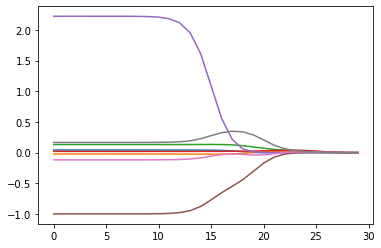

In [51]:
# 据说这图绘出了回归系数与log(𝞴)
# 每条线对应ridgeWeights数据集中的一列，ridgeWeights数据集中的每一行对应不同𝞴值对应的回归系数
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(ridgeWeights)
plt.show()

## lasso

当两个或更多的特征相关时，使用最小二乘法会得到一个很大的正系数和一个很大的负系数。岭回归通过限制回归系数平方和不能大于  𝞴避免了这个问题。
$$\sum_{k=1}^nw^2 <= 𝞴$$ 

$\color{#FF0000}{缩减法lasso对回归系数做了限定}$  
$$\sum_{k=1}^n|w_k| <= 𝞴$$ 

## 前向逐步回归

In [116]:
xArr, yArr = loadDataSet('abalone.txt')

In [60]:
def regularize(xMat):
    xMean = np.mean(xMat,0)
    xVar = np.var(xMat,0)
    inMat = (xMat - xMean)/xVar
    return inMat

In [120]:
# 复现
def stageWise1(xArr, yArr, eps=0.01, numIt=100):
    xMat = np.mat(xArr); yMat = np.mat(yArr).T
    yMean = np.mean(yArr,0)
    yMat = yMat - yMean
    xMat = regularize(xMat)
    m,n = np.shape(xMat)
    lowestError = np.inf # 书上的代码lowestError的赋值写在循环里面，最后的结果一致
    ws = np.zeros([n,1]); wsMax = ws.copy()
    for i in range(numIt):
        for j in range(n):
            for sign in [-1,1]:
                wsTest = ws.copy() 
#                 print('wsTest'); print(wsTest); print('wsMax'); print(wsMax)
                wsTest[j] = wsTest[j] + sign*eps
                yTest = xMat*wsTest
                rssE = rssError(yMat.A, yTest.A)
#                 print('lowestError'); print(lowestError)
                if rssE < lowestError:
                    lowestError = rssE
                    wsMax = wsTest
        ws = wsMax
    return ws

In [110]:
def stageWise(xArr,yArr,eps=0.01,numIt=100):
    xMat = np.mat(xArr); yMat=np.mat(yArr).T
    yMean = np.mean(yMat,0)
    yMat = yMat - yMean     #can also regularize ys but will sget smaller coef
    xMat = regularize(xMat)
    m,n=np.shape(xMat)
    returnMat = np.zeros((numIt,n)) #testing code remove
    ws = np.zeros((n,1)); wsTest = ws.copy(); wsMax = ws.copy()
    for i in range(numIt):
#         print(ws.T)
        lowestError = np.inf; 
        for j in range(n):
            for sign in [-1,1]:
                wsTest = ws.copy()
                wsTest[j] += eps*sign
#                 print(j); print('wsTest'); print(wsTest)
                yTest = xMat*wsTest
                rssE = rssError(yMat.A,yTest.A)
#                 print('rssE'); print(rssE)
                if rssE < lowestError:
                    lowestError = rssE
                    wsMax = wsTest
#                     print('wsMax'); print(wsMax)
        ws = wsMax.copy()
        print('ws'); print(ws)
        returnMat[i,:]=ws.T # 可观测到外层循环每次返回的ws的值
    return returnMat

In [127]:
stageWise1(xArr, yArr, 0.001, 5000)

array([[ 0.043],
       [-0.01 ],
       [ 0.119],
       [ 0.022],
       [ 2.004],
       [-0.959],
       [-0.104],
       [ 0.189]])

In [125]:
# 与最小二乘法比较
xMat = np.mat(xArr)
yMat = np.mat(yArr).T
xMat = regularize(xMat)
yMean = np.mean(yMat,0)
yMat = yMat - yMean
weights = standRegres(xMat,yMat.T)
weights.T

matrix([[ 0.0430442 , -0.02274163,  0.13214087,  0.02075182,  2.22403814,
         -0.99895312, -0.11725427,  0.16622915]])

# 预测乐高玩具套装的价格

## 收集数据 ：使用Google购物的API

In [166]:
from bs4 import BeautifulSoup

# 从页面读取数据
def scrapePage(retX, retY, inFile, yr, numPce, origPrc):
    """""
    Parameters:
        reX - 数据x
        retY - 数据y
        inFile - HTML文件
        yr - 年份
        numPce - 乐高部件数目
        origPrc - 原价
    Returns:
        无
    """
    # 打开并读取HTML文件
    with open(inFile, encoding = 'utf-8') as f:
        html = f.read()
        soup = BeautifulSoup(html)
    i = 1
    # 根据HTML页面结构进行解析
    currentRow = soup.find_all('table', r='%d' % i)
    while (len(currentRow) != 0):
#         currentRow = soup.find_all('table', r='%d' % i)
        title = currentRow[0].find_all('a')[1].text
        lwrTitle = title.lower()
        # 查找是否有全新标签
        if (lwrTitle.find('new') > -1) or (lwrTitle.find('nisb') > -1):
            newFlag = 1.0
        else:
            newFlag = 0.0
        # 查找是否已经出售，我们只收集出售数据
        soldUnicde = currentRow[0].find_all('td')[3].find_all('span')
        if len(soldUnicde) == 0:
            print("商品 #%d 没有出售" % i)
        else:
            # 解析页面获取当前价格
            soldPrice = currentRow[0].find_all('td')[4]
            priceStr = soldPrice.text
            priceStr = priceStr.replace('$', '')
            priceStr = priceStr.replace(',', '')
            if len(soldPrice) > 1:
                priceStr = priceStr.replace('Free shipping', '')
            sellingPrice = float(priceStr)
            if sellingPrice > origPrc*0.5:
                print('%d\t%d\t%d\t%f\t%f' % (yr, numPce, newFlag, origPrc, sellingPrice))
                retX.append([yr, numPce, newFlag, origPrc])
                retY.append(sellingPrice)
        i = i + 1
        currentRow = soup.find_all('table', r='%d' % i)

In [167]:
# 依次读取六种乐高套装的数据，并生成数据矩阵
def setDataCollect(retX, retY):
	# 2006年的乐高8288,部件数目800,原价49.99
    scrapePage(retX, retY, './setHtml/lego8288.html', 2006, 800, 49.99)
    # 2002年的乐高10030,部件数目3096,原价269.99
    scrapePage(retX, retY, './setHtml/lego10030.html', 2002, 3096, 269.99)
    # 2007年的乐高10179,部件数目5195,原价499.99
    scrapePage(retX, retY, './setHtml/lego10179.html', 2007, 5195, 499.99)
    # 2007年的乐高10181,部件数目3428,原价199.99
    scrapePage(retX, retY, './setHtml/lego10181.html', 2007, 3428, 199.99)
    # 2008年的乐高10189,部件数目5922,原价299.99
    scrapePage(retX, retY, './setHtml/lego10189.html', 2008, 5922, 299.99)
    # 2009年的乐高10196,部件数目3263,原价249.99
    scrapePage(retX, retY, './setHtml/lego10196.html', 2009, 3263, 249.99)

In [328]:
retX = []; retY = []
#setDataCollect(retX, retY)

In [330]:
# 网上的参考代码

from bs4 import BeautifulSoup

# 从页面读取数据，生成retX和retY列表
def scrapePage(retX, retY, inFile, yr, numPce, origPrc):
    """
    Parameters:
        retX - 数据X
        retY - 数据Y
        inFile - HTML文件
        yr - 年份
        numPce - 乐高部件数目
        origPrc - 原价
    Returns:
        无
    """
    # 打开并读取HTML文件
    with open(inFile, encoding='utf-8') as f:
        html = f.read()
    soup = BeautifulSoup(html)
    i = 1
    # 根据HTML页面结构进行解析
    currentRow = soup.find_all('table', r="%d" % i)
    while (len(currentRow) != 0):
        currentRow = soup.find_all('table', r="%d" % i)
        title = currentRow[0].find_all('a')[1].text
        lwrTitle = title.lower()
        # 查找是否有全新标签
        if (lwrTitle.find('new') > -1) or (lwrTitle.find('nisb') > -1):
            newFlag = 1.0
        else:
            newFlag = 0.0
        # 查找是否已经标志出售，我们只收集已出售的数据
        soldUnicde = currentRow[0].find_all('td')[3].find_all('span')
        if len(soldUnicde) == 0:
            print("商品 #%d 没有出售" % i)
        else:
            # 解析页面获取当前价格
            soldPrice = currentRow[0].find_all('td')[4]
            priceStr = soldPrice.text
            priceStr = priceStr.replace('$', '')
            priceStr = priceStr.replace(',', '')
            if len(soldPrice) > 1:
                priceStr = priceStr.replace('Free shipping', '')
            sellingPrice = float(priceStr)
            # 去掉不完整的套装价格
            if sellingPrice > origPrc * 0.5:
                print("%d\t%d\t%d\t%f\t%f" % (yr, numPce, newFlag, origPrc, sellingPrice))
                retX.append([yr, numPce, newFlag, origPrc])
                retY.append(sellingPrice)
        i += 1
        currentRow = soup.find_all('table', r="%d" % i)

# 依次读取六种乐高套装的数据，并生成数据矩阵
def setDataCollect(retX, retY):
	# 2006年的乐高8288,部件数目800,原价49.99
    scrapePage(retX, retY, './setHtml/lego8288.html', 2006, 800, 49.99)
    # 2002年的乐高10030,部件数目3096,原价269.99
    scrapePage(retX, retY, './setHtml/lego10030.html', 2002, 3096, 269.99)
    # 2007年的乐高10179,部件数目5195,原价499.99
    scrapePage(retX, retY, './setHtml/lego10179.html', 2007, 5195, 499.99)
    # 2007年的乐高10181,部件数目3428,原价199.99
    scrapePage(retX, retY, './setHtml/lego10181.html', 2007, 3428, 199.99)
    # 2008年的乐高10189,部件数目5922,原价299.99
    scrapePage(retX, retY, './setHtml/lego10189.html', 2008, 5922, 299.99)
    # 2009年的乐高10196,部件数目3263,原价249.99
    scrapePage(retX, retY, './setHtml/lego10196.html', 2009, 3263, 249.99)


# if __name__ == '__main__':
#     lgX = []
#     lgY = []
#     setDataCollect(lgX, lgY)


## 训练算法：简单线性回归

In [181]:
np.shape(retX)

(63, 4)

In [191]:
lgX = retX; lgY = retY

In [195]:
lgX1 = np.mat(np.ones([63, 5]))

In [196]:
lgX1[:, 1:5] = np.mat(lgX)

In [197]:
lgX[0]

[2006, 800, 0.0, 49.99]

In [198]:
lgX1[0]

matrix([[1.000e+00, 2.006e+03, 8.000e+02, 0.000e+00, 4.999e+01]])

In [199]:
ws = standRegres(lgX1, lgY)
ws

matrix([[ 5.53199701e+04],
        [-2.75928219e+01],
        [-2.68392234e-02],
        [-1.12208481e+01],
        [ 2.57604055e+00]])

上面的结果并不能令人满意，套装零件数越多价格反而会越低，对新套装也有一定的惩罚。

下面数据对比预测数据与真实值

In [201]:
lgX1[0]*ws

matrix([[76.07418828]])

In [208]:
lgY[0]

85.0

In [202]:
lgX1[-1]*ws

matrix([[431.17797647]])

In [209]:
lgY[-1]

331.51

In [203]:
lgX1[43]*ws

matrix([[516.2073308]])

In [210]:
lgY[43]

530.0

## 训练算法：岭回归，并用交叉验证测试

In [223]:
import random

In [237]:
indexList = list(range(10))
indexList

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [240]:
random.shuffle(indexList)
indexList

[1, 4, 0, 9, 7, 5, 8, 3, 6, 2]

In [315]:
# 网上复制的代码
def crossValidation(xArr, yArr, numVal = 10):
    """
    Parameters:
        xArr - x数据集
        yArr - y数据集
        numVal - 交叉验证次数
    Returns:
        wMat - 回归系数矩阵
    """
    m = len(yArr)                                                   #统计样本个数                       
    indexList = list(range(m))                                      #生成索引值列表
    errorMat = np.zeros((numVal,30))                                #create error mat 30columns numVal rows
    for i in range(numVal):                                         #交叉验证numVal次
        trainX = []; trainY = []                                    #训练集
        testX = []; testY = []                                      #测试集
        random.shuffle(indexList)                                   #打乱次序
        for j in range(m):                                          #划分数据集:90%训练集，10%测试集
            if j < m * 0.9:
                trainX.append(xArr[indexList[j]])
                trainY.append(yArr[indexList[j]])
            else:
                testX.append(xArr[indexList[j]])
                testY.append(yArr[indexList[j]])
        wMat = ridgeTest(trainX, trainY)                            #获得30个不同lambda下的岭回归系数
#         print('i', i, 'wMat:',  wMat)
        for k in range(30):                                         #遍历所有的岭回归系数
            matTestX = np.mat(testX); matTrainX = np.mat(trainX)    #测试集
            meanTrain = np.mean(matTrainX,0)                        #测试集均值
            varTrain = np.var(matTrainX,0)                          #测试集方差
            matTestX = (matTestX - meanTrain) / varTrain            #测试集标准化
            yEst = matTestX * np.mat(wMat[k,:]).T + np.mean(trainY) #根据ws预测y值
            errorMat[i, k] = rssError(yEst.T.A, np.array(testY))    #统计误差
#             print('i= %d k = %d errorMat:%d' % (i, k, errorMat[i,k]))
#     print(errorMat)
    meanErrors = np.mean(errorMat,0)                                #计算每次交叉验证的平均误差
#     print('errorMat:', errorMat); print('meanErrors:', meanErrors)
    minMean = float(min(meanErrors))                                #找到最小误差
#     print('minMean', minMean)
    bestWeights = wMat[np.nonzero(meanErrors == minMean)]           #找到最佳回归系数
    print('wMat', wMat)
    print(np.nonzero(meanErrors == minMean))
    print(wMat[np.nonzero(meanErrors == minMean)])
    xMat = np.mat(xArr); yMat = np.mat(yArr).T
    meanX = np.mean(xMat,0); varX = np.var(xMat,0)
    unReg = bestWeights / varX                                      #数据经过标准化，因此需要还原
    print('%f%+f*年份%+f*部件数量%+f*是否为全新%+f*原价' % ((-1 * np.sum(np.multiply(meanX,unReg)) + np.mean(yMat)), unReg[0,0], unReg[0,1], unReg[0,2], unReg[0,3]))  

In [277]:
import random

In [327]:
def crossValidation(xArr, yArr, numVal=10):
    """"
    Parameters:
        xArr - x数据集
        yArr - y数据集
        numVal - 交叉验证次数
    Returns:
        wMat - 回归系数矩阵
    """
    m = len(yArr)
    indexList = list(range(m))
    errorMat = np.zeros([numVal, 30]) #每次交叉验证岭回归将产生30组回归系数
    # 创建训练集、测试集，并对数据进行混洗
    for i in range(numVal):
        trainX = []; trainY = []
        testX = []; testY = []
        random.shuffle(indexList)
        # 将数据分配给训练集跟测试集
        for j in range(m):
            if j < m*0.9:
                trainX.append(xArr[indexList[j]])
                trainY.append(yArr[indexList[j]])
            else:
                testX.append(xArr[indexList[j]])
                testY.append(yArr[indexList[j]])
        wMat = ridgeTest(trainX, trainY)
        print(wMat)
        # 计算误差
        for k in range(30):
            matTestX = np.mat(testX); matTrainX = np.mat(trainX)
            meanTrain = np.mean(matTrainX, 0)
            varTrain = np.var(matTrainX, 0)
            matTestX = (matTestX - meanTrain) / varTrain            # 测试集标准化
            yEst = matTestX*np.mat(wMat[k,:]).T + np.mean(trainY)   # 根据ws预测y值
            errorMat[i, k] = rssError(yEst.T.A, np.array(testY))    # 统计误差
            print(errorMat[i, k])
    # 找到误差最小的预测系数
    meanErrors = np.mean(errorMat, 0)
    minMean = float(min(meanErrors))
    bestWeights = wMat[np.nonzero(meanErrors == minMean)]
    # 将标准化过后的数据还原
    xMat = np.mat(xArr); yMat = np.mat(yArr).T
    meanX = np.mean(xMat,0); varX = np.var(xMat,0)
    unReg = bestWeights / varX
    print('%f%+f*年份%+f*部件数量%+f*是否为全新%+f*原价' % ((-1 * np.sum(np.multiply(meanX,unReg)) + np.mean(yMat)), unReg[0,0], unReg[0,1], unReg[0,2], unReg[0,3]))  

In [329]:
lgX = []; lgY = []
# setDataCollect(lgX, lgY)
# crossValidation(lgX, lgY)